### Generating Barabási-Albert Networks
#### With the help of a computer, generate a network with N = 10^4 nodes using the Barabási-Albert model with m = 4. Use as initial condition a fully connected network with m = 4 nodes.

In [71]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx import Graph
import numpy as np
import pandas as pd
#from scipy.optimize import curve_fit
import seaborn as sns

In [29]:
def generate_network(N: int, m: int) -> Graph:
    inital_graph = nx.complete_graph(m)
    return nx.barabasi_albert_graph(N, m, seed=None, initial_graph=inital_graph)

def sorted_degree_sequence(G: Graph) -> list:
    return sorted((d for n, d in G.degree()), reverse=True)

def measure_degree_distribution(G: Graph) -> None:
    degree_sequence = sorted_degree_sequence(G)
    
    fig = plt.figure("Degree of a random graph", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(5, 4)
    
    ax0 = fig.add_subplot(axgrid[0:3, :])
    Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
    pos = nx.spring_layout(Gcc, seed=10396953)
    nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
    nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
    ax0.set_title("Connected components of G")
    ax0.set_axis_off()

    ax1 = fig.add_subplot(axgrid[3:, :2])
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")

    ax2 = fig.add_subplot(axgrid[3:, 2:])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")

    fig.tight_layout()
    plt.show()

In [30]:
N = 10000
m = 4
G = generate_network(N, m)

Measure the degree distribution at intermediate steps, namely when the network has 10^2, 10^3 and 10^4 nodes.

100 nodes:


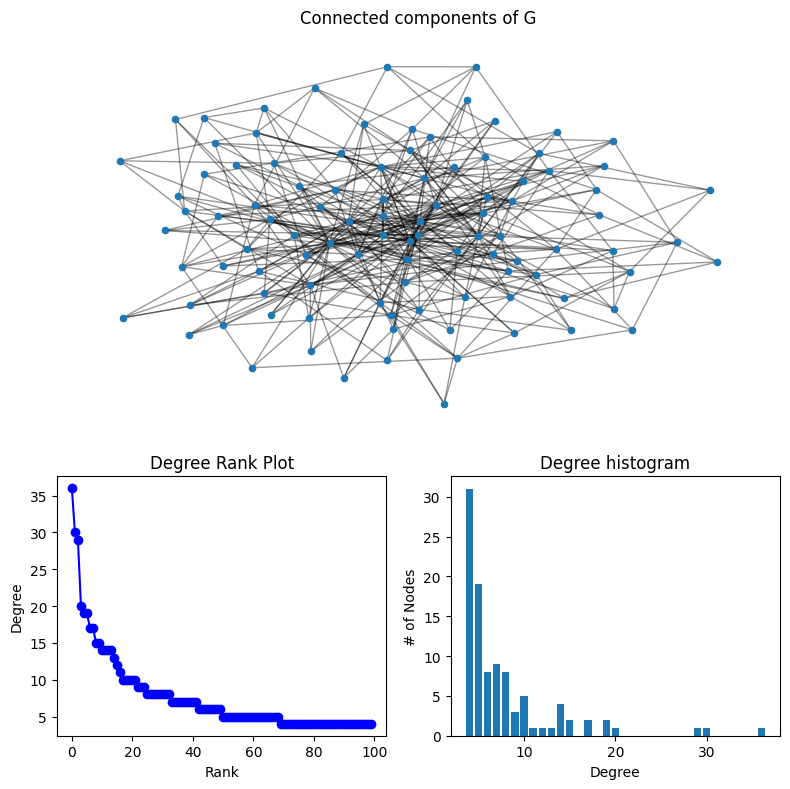

1000 nodes:


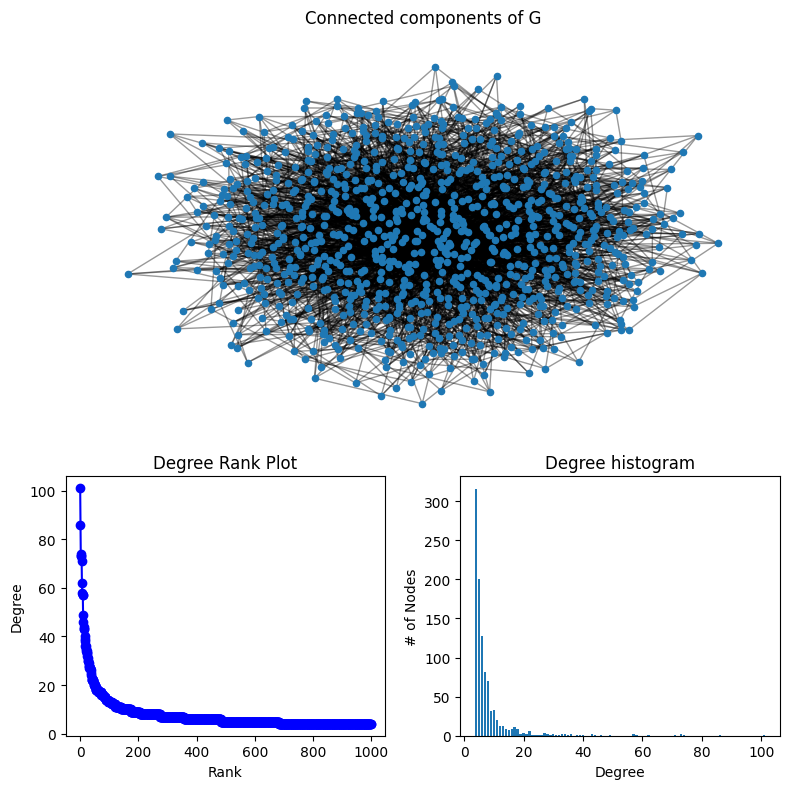

10000 nodes:


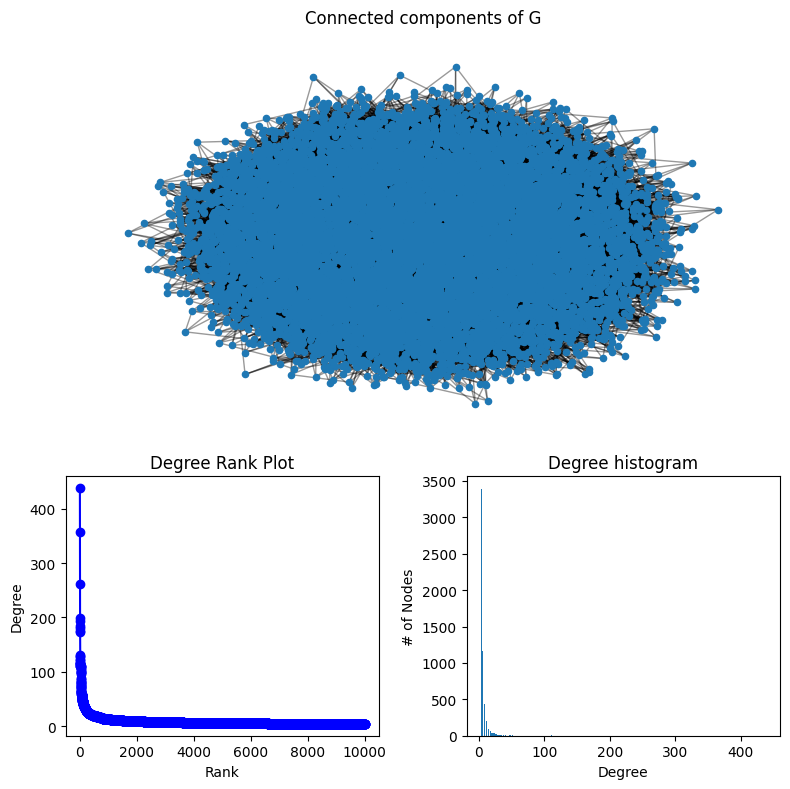

In [31]:
N_list = [100, 1000, 10000]
for N in N_list:
    print(f"{N} nodes:")
    measure_degree_distribution(generate_network(N, m))

Compare the distributions at these intermediate steps by plotting them together and fitting each to a power-law with degree exponent γ. Do the distributions "converge"?

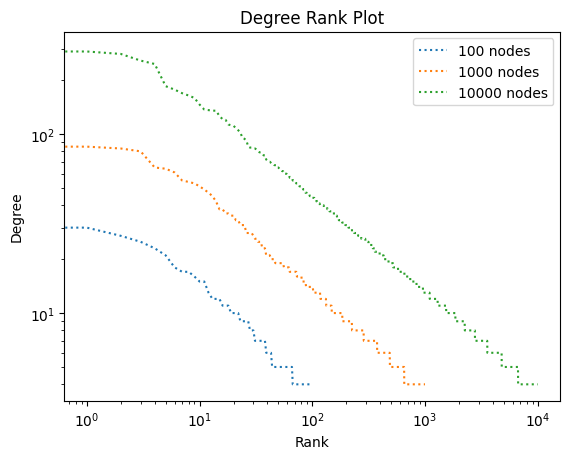

In [64]:
for N in N_list:
    degree_sequence = sorted_degree_sequence(generate_network(N, m))
    #x, y = zip(*degree_sequence)
    #popt, pcov = curve_fit(lambda fx,a,b: a*fx**-b, x, y)
    #power_y = popt[0]*x**-popt[1]
    plt.plot(degree_sequence, label = f"{N} nodes", linestyle=":")
    #plt.plot(x, power_y, label='power-fit')
    plt.title("Degree Rank Plot")
    plt.ylabel("Degree")
    plt.xlabel("Rank")
    plt.xscale("log")
    plt.yscale("log")
    plt.legend() 
plt.show()

TypeError: lmplot() takes 1 positional argument but 3 were given

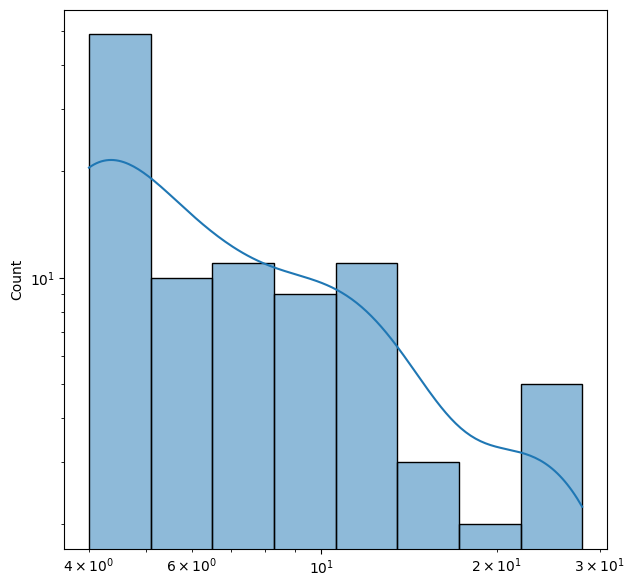

In [72]:
for N in N_list:
    f, ax = plt.subplots(figsize=(7, 7))
    ax.set(xscale="log", yscale="log")
    degree_sequence = sorted_degree_sequence(generate_network(N, m))
    sns.histplot(degree_sequence, kde=True)


Plot together the cumulative degree distributions at intermediate steps.

Measure the average clustering coefficient in function of N.

Following Image 5.6a, measure the degree dynamics of one of the initial nodes and of the nodes added to the network at time t = 100, t = 1,000 and t = 5,000.